In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1: No-Source Finite Difference Solver
## Question 1: Plot the voltage as a function of position
This was solved using the normal (non-sparse) NumPy array

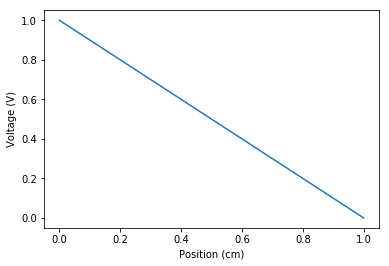

In [2]:
def solve_for_voltage(size,boundaries,positions = (0,1),cond_S_per_cm= 1000):
    ''' 
    `size` - number of divisions used to discretize line -- doesn't include boundaries
    `boundaries` - tuple containing voltage on bounds like `(V_left,V_right)` `positions` - A tuple containing the x and y distance of the line to be plotted in cm
    `cond_S_per_cm` - conductivity
    '''

    boundary_left ,boundary_right = boundaries
    pos_left,pos_right = positions
    
    pos = np.linspace(pos_left,pos_right,size+2) # size just includes 
    A = np.zeros((size,size))

    #toeplitz-izing empty matrix
    for i in range(size):
        A[i,i] = 2
        if i ==size-1:
            break
        A[i,i+1] = -1
        A[i+1,i] = -1

    b = np.zeros((size,1))

    b[0,0] = boundary_left
    b[size-1,0] = boundary_right
    
    x = np.linalg.solve(A,b)
    x = np.concatenate((np.array([[boundary_left]]),x,np.array([[boundary_right]])))
    return pos,x # equivalent of MATLAB backslash

plt.xlabel("Position (cm)")
plt.ylabel("Voltage (V)")
plt.plot(*solve_for_voltage(100,(1,0)))

## Question 2: Plot time to execute and memory usage as a function of array size

89.2 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
95.1 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
141 µs ± 7.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
170 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
254 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
545 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.08 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.86 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.3 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
56.7 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


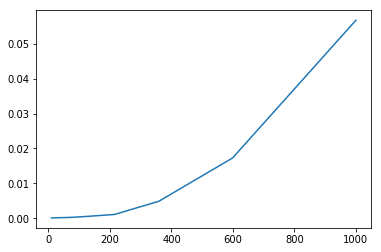

In [3]:
import timeit
N_list = np.floor(np.logspace(1,3,10))
times = []
for n in N_list:
    result = %timeit -o solve_for_voltage(int(n),(1,0))
    times.append(result.average)
plt.plot(N_list,times)

peak memory: 84.46 MiB, increment: 0.08 MiB
peak memory: 84.46 MiB, increment: 0.00 MiB
peak memory: 84.46 MiB, increment: 0.00 MiB
peak memory: 84.46 MiB, increment: 0.00 MiB
peak memory: 84.49 MiB, increment: 0.03 MiB
peak memory: 84.88 MiB, increment: 0.39 MiB
peak memory: 85.33 MiB, increment: 0.45 MiB
peak memory: 86.59 MiB, increment: 1.26 MiB
peak memory: 90.10 MiB, increment: 5.48 MiB
peak memory: 99.89 MiB, increment: 15.27 MiB


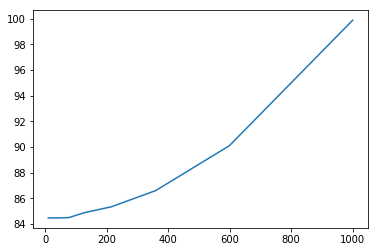

In [4]:
%load_ext memory_profiler

mems = []
for n in N_list:
    result = %memit -o solve_for_voltage(int(n),(1,0))
    mems.append(result.mem_usage[0])
plt.plot(N_list,mems)

## Question 3: Sparse implementation

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


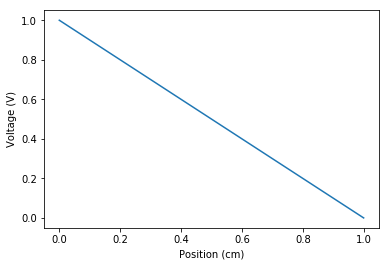

In [5]:
import scipy.sparse as sp
import scipy.sparse.linalg as spla
def solve_for_voltage_sparse(size,boundaries,positions = (0,1),cond_S_per_cm= 1000):
    ''' 
    `size` - number of divisions used to discretize line
    `boundaries` - tuple containing voltage on bounds like `(V_left,V_right)` `positions` - A tuple containing the x and y distance of the line to be plotted in cm
    `cond_S_per_cm` - conductivity
    '''

    boundary_left ,boundary_right = boundaries
    pos_left,pos_right = positions
    
    pos = np.linspace(pos_left,pos_right,size+2)

    A = sp.diags([-1, 2, -1], [-1, 0, 1], shape=(size, size))
    b = np.zeros((size,1))

    b[0,0] = boundary_left
    b[size-1,0] = boundary_right

    x = spla.spsolve(A,b).reshape((size,1))
    x = np.concatenate((np.array([[boundary_left]]),x,np.array([[boundary_right]])))
    return pos,x # equivalent of MATLAB backslash

plt.xlabel("Position (cm)")
plt.ylabel("Voltage (V)")
plt.plot(*solve_for_voltage_sparse(100,(1,0)))

536 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
536 µs ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
547 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
561 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
577 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
628 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
675 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
761 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
915 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.52 ms ± 7.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


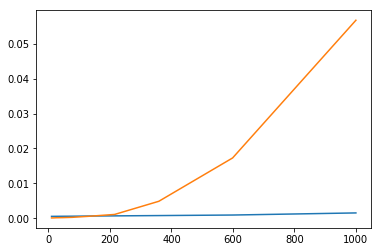

In [6]:
import timeit
N_list = np.floor(np.logspace(1,3,10))
times_sparse = []
for n in N_list:
    result = %timeit -o solve_for_voltage_sparse(int(n),(1,0))
    times_sparse.append(result.average)
plt.plot(N_list,times_sparse)
plt.plot(N_list,times)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 96.76 MiB, increment: 0.00 MiB
peak memory: 96.76 MiB, increment: 0.00 MiB
peak memory: 96.76 MiB, increment: 0.00 MiB
peak memory: 96.78 MiB, increment: 0.02 MiB
peak memory: 96.78 MiB, increment: 0.00 MiB
peak memory: 96.79 MiB, increment: 0.00 MiB
peak memory: 96.79 MiB, increment: 0.00 MiB
peak memory: 96.80 MiB, increment: 0.01 MiB
peak memory: 97.07 MiB, increment: 0.27 MiB
peak memory: 97.14 MiB, increment: 0.08 MiB


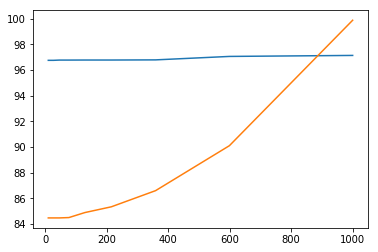

In [7]:
%load_ext memory_profiler

mems_sparse = []
for n in N_list:
    result = %memit -o solve_for_voltage_sparse(int(n),(1,0))
    mems_sparse.append(result.mem_usage[0])
plt.plot(N_list,mems_sparse)
plt.plot(N_list,mems)

## Question 4: Why is conductivity not part of the equations?
Conductivity is not part of the equations because we are not asked to plot current as a function of position, in which case we would need the conductivity

## Question 5: What would happen if the conductivity was voltage dependent?
If the *permittivity* was voltage dependent (assuming $\frac\rho\epsilon$ is the source $s(\phi,r)$), then we would have to iterate over solving $A$, each time plugging in the new $\phi$ vector in to get $\epsilon$ to get the next $b$ in turn.

## Question 6: What would change if we looked at a 2D piece of polymer instead of a 1D piece?
We would have to define a discrete derivative on that space, populate an $A$ matrix given what coefficient the discrete derivative gives to each $\phi_{i,j} $ 

# Assigment 2:Poisson Equation and 1-D finite difference
I couldn't quite make sense of having current as the source for the general steady state equation, so instead I substituted charge density for current along the line.

## Question  1: Plot voltage and charge as a function of position
As detailed in the prompt .pdf, we simply must subtract the value of the source function from the $\vec{b}$ vector. I implemented this by letting the function accepct a function object which is called over the position vector in order to give a vector $\vec{s}$ of charge corresponding to different points along the polyacetylene. 


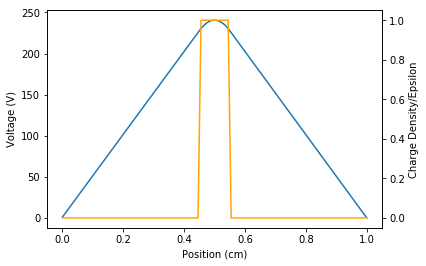

In [8]:
charge_length = 0.1 #cm 
charge = 1 # couloumb farads per meter

def charge_at_position(pos):
    return np.where(abs(0.5-pos)<charge_length/2,charge,0) # return `charge` if in middle `charge_len` cm, else 0

def solve_for_voltage_with_source(size,boundaries,source_func=lambda x: 0*x,positions = (0,1),cond_S_per_cm= 1000):
    ''' 
    `size` - number of divisions used to discretize line
    `boundaries` - tuple containing voltage on bounds like `(V_left,V_right)` `positions` - A tuple containing the x and y distance of the line to be plotted in cm
    `cond_S_per_cm` - conductivity
    '''

    boundary_left ,boundary_right = boundaries
    pos_left,pos_right = positions
    
    # Vector of positions to use
    pos = np.linspace(pos_left,pos_right,size+2)
    
    # Source Function
    s = source_func(pos).reshape((size+2,1))
    
    # Making A
    A = np.zeros((size,size))
    for i in range(size):
        A[i,i] = 2
        if i ==size-1:
            break
        A[i,i+1] = -1
        A[i+1,i] = -1
        
    # Making B
    b = np.zeros((size,1))
    b[0,0] = boundary_left
    b[size-1,0] = boundary_right
    b += s[1:-1] # add the source function 
    
    
    x = np.linalg.solve(A,b)
    x = np.concatenate((np.array([[boundary_left]]),x,np.array([[boundary_right]])))
    return pos,x,s # equivalent of MATLAB backslash

plt.xlabel("Position (cm)")
plt.ylabel("Voltage (V)")

x,v,s = solve_for_voltage_with_source(100,(1,0),charge_at_position)
plt.plot(x,v)
ax2=plt.twinx()
ax2.set_ylabel("Charge Density/Epsilon")
ax2.plot(x,s,color = 'orange')

## Question 2: Check Performance Again

94.3 µs ± 6.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
96.8 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
135 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
176 µs ± 4.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
258 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
581 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.08 ms ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.29 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.9 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
58.5 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


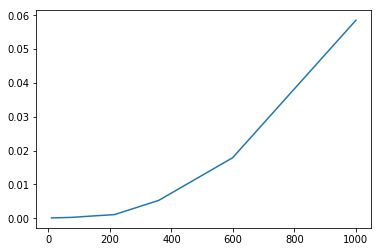

In [9]:
import timeit
N_list = np.floor(np.logspace(1,3,10))
times = []
for n in N_list:
    result = %timeit -o solve_for_voltage(int(n),(1,0))
    times.append(result.average)
plt.plot(N_list,times)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 100.13 MiB, increment: 0.00 MiB
peak memory: 100.15 MiB, increment: 0.02 MiB
peak memory: 100.15 MiB, increment: 0.00 MiB
peak memory: 100.15 MiB, increment: 0.00 MiB
peak memory: 100.15 MiB, increment: 0.00 MiB
peak memory: 100.17 MiB, increment: 0.02 MiB
peak memory: 100.27 MiB, increment: 0.10 MiB
peak memory: 101.88 MiB, increment: 1.61 MiB
peak memory: 105.39 MiB, increment: 5.48 MiB
peak memory: 115.18 MiB, increment: 15.27 MiB


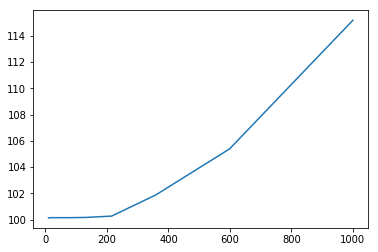

In [10]:
%load_ext memory_profiler

mems = []
for n in N_list:
    result = %memit -o solve_for_voltage(int(n),(1,0))
    mems.append(result.mem_usage[0])
plt.plot(N_list,mems)

## Question 3: Check Performance for Sparse implementation

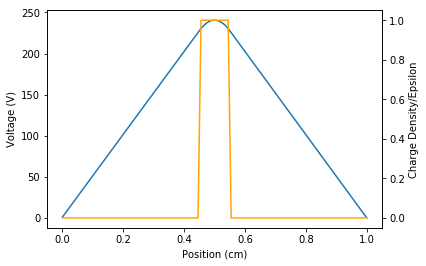

In [11]:
charge_length = 0.1 #cm 
charge = 1 # couloumb farads per meter

def charge_at_position(pos):
    return np.where(abs(0.5-pos)<charge_length/2,charge,0) # return `charge` if in middle `charge_len` cm, else 0

def solve_for_voltage_with_source_sparse(size,boundaries,source_func=lambda x: 0*x,positions = (0,1),cond_S_per_cm= 1000):
    ''' 
    `size` - number of divisions used to discretize line
    `boundaries` - tuple containing voltage on bounds like `(V_left,V_right)` `positions` - A tuple containing the x and y distance of the line to be plotted in cm
    `cond_S_per_cm` - conductivity
    '''

    boundary_left ,boundary_right = boundaries
    pos_left,pos_right = positions
    
    # Vector of positions to use
    pos = np.linspace(pos_left,pos_right,size+2)
    
    # Source Function
    s = source_func(pos).reshape((size+2,1))
    
    boundary_left ,boundary_right = boundaries
    pos_left,pos_right = positions
    
    A = sp.diags([-1, 2, -1], [-1, 0, 1], shape=(size, size))
    b = np.zeros((size,1))

    b[0,0] = boundary_left
    b[size-1,0] = boundary_right
    b += s[1:-1] # add the source function

    x = spla.spsolve(A,b).reshape((size,1))
    x = np.concatenate((np.array([[boundary_left]]),x,np.array([[boundary_right]])))
    return pos,x,s # equivalent of MATLAB backslash

plt.xlabel("Position (cm)")
plt.ylabel("Voltage (V)")

x,v,s = solve_for_voltage_with_source_sparse(100,(1,0),charge_at_position)

plt.plot(x,v)
ax2=plt.twinx()
ax2.set_ylabel("Charge Density/Epsilon")
ax2.plot(x,s,color = 'orange')

633 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
621 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
623 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
633 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
628 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
620 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
631 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
669 µs ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
629 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
631 µs ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


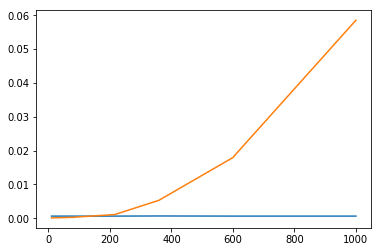

In [12]:
import timeit
N_list = np.floor(np.logspace(1,3,10))
times_sparse = []
for n in N_list:
    result = %timeit -o solve_for_voltage_with_source_sparse(100,(1,0),charge_at_position)
    times_sparse.append(result.average)
plt.plot(N_list,times_sparse)
plt.plot(N_list,times)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 103.63 MiB, increment: 0.01 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB
peak memory: 103.63 MiB, increment: 0.00 MiB


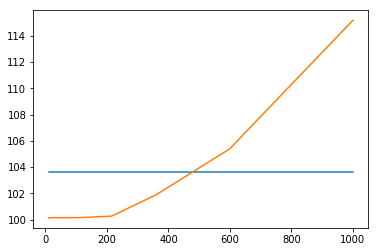

In [13]:
%load_ext memory_profiler

mems_sparse = []
for n in N_list:
    result = %memit -o solve_for_voltage_with_source_sparse(100,(1,0),charge_at_position)
    mems_sparse.append(result.mem_usage[0])
plt.plot(N_list,mems_sparse)
plt.plot(N_list,mems)

## Question 4: Now does conductivity play a role?
conductivity will still not play a role since there is no current in this scenario as charges are forced to stay at specific place in rod.